In [0]:
import pandas as pd
import pandas_datareader as pdr

In [0]:
stock_type = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt'
}

def get_code(df, name):
  code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
  code = code.strip()
  return code

def get_download_stock(market_type=None):
  market_type_param = stock_type[market_type]
  download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&marketType=' + market_type_param
  
  df = pd.read_html(download_link, header=0)[0]
  return df;

def get_download_kospi():
  df = get_download_stock('kospi')
  df.종목코드 = df.종목코드.map('{:06d}.KS'.format)
  return df

def get_download_kosdaq():
  df = get_download_stock('kosdaq')
  df.종목코드 = df.종목코드.map('{:06d}.KQ'.format)
  return df

In [0]:
# kospi, kosdaq 종목코드 각각 다운로드
kospi_df = get_download_kospi()
kosdaq_df = get_download_kosdaq()

# data frame merge
code_df = pd.concat([kospi_df, kosdaq_df])

# data frame정리
code_df = code_df[['회사명', '종목코드']]

# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})

In [4]:
code_df

,name,code
0,JS전선,005560.KS
1,거북선2호,101380.KS
2,거북선6호,114140.KS
3,교보메리츠,064900.KS
4,국제관광공사,028780.KS
...,...,...
2215,한라IMS,092460.KQ
2216,한류AI센터,222810.KQ
2217,홈센타홀딩스,060560.KQ
2218,휴맥스,115160.KQ


In [5]:
code = get_code(code_df, '카카오')
code

'035720.KS'

In [6]:
df = pdr.get_data_yahoo(code)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,74200.0,69100.0,70300.0,73400.0,158976.0,69441.968750
2010-01-05,75300.0,72200.0,73000.0,74000.0,124156.0,70009.625000
2010-01-06,75200.0,73000.0,74600.0,74300.0,72453.0,70293.445312
2010-01-07,74800.0,72100.0,74300.0,73400.0,99241.0,69441.968750
2010-01-08,73500.0,70100.0,73500.0,72900.0,114554.0,68968.937500
...,...,...,...,...,...,...
2020-02-20,191500.0,188000.0,190500.0,190500.0,547405.0,190500.000000
2020-02-21,191500.0,187500.0,188500.0,189500.0,558497.0,189500.000000
2020-02-24,186000.0,182000.0,184500.0,183500.0,792733.0,183500.000000


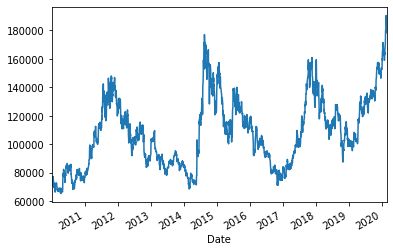

In [7]:
df['Close'].plot()